# Homework Assignment 2

This assignment will cover applications of econometrics and machine learning we covered in class. For this assignment, you should write/type your answers into this worksheet. You must also submit your python code. Alternatively, you can make a Jupyter notebook and combine your written answers, code, and output. 

You may discuss the problem set with your class mates, but every student must do their own work. It is always important to cite our references that help us in our work. Please cite the students you work with here: ___ , ____, _____


In [88]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import random
import statsmodels.api as sm
from statsmodels.iolib.summary2 import summary_col

from sklearn.model_selection import train_test_split
from sklearn.linear_model import Lasso, LassoCV
from sklearn.linear_model import Ridge, RidgeCV
from sklearn.preprocessing import normalize
import scipy.cluster.hierarchy as shc
from sklearn.cluster import AgglomerativeClustering
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA

from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler

1) Set the random seed to be equal to 1680.  
a. Generate a random integer between (0,10). Hint: use random.randint  

b. What is that random integer?   
Answer:  4  

c. Why is it important to set a random seed when coding random variables?  
Setting the random see is important so you can get reproducible results.

In [89]:
# This sets the seed to be 1680
random.seed(1680)

# This prints a random integer from 1 to 10
print(random.randint(0,10))

4


2. Comment to explain each line of code below and run the following code to generate data:


In [90]:
# This line sets the random seed of the random number generator so we can get a reproducible random result
rng=np.random.RandomState(1680)

# This sets N = 100, which will be used to generate 100 random values
N = 100

# This sets inpute_range = 4, which will be used to adjust the default range of uniform [0,1] to uniform [-2, 2]
input_range = 4

# This creates the vector X which stores 100 uniform random values on the range [-2,2]
X = np.sort(rng.rand(N)*input_range - input_range/2)

# This creates the vector noise which stores 100 normal random values with the distribution N(0, 0.8)
noise = rng.randn(N)*0.8

# This creates the vector linear, which is the random vector X scaled by 5 with the other random vector noise added
# to it.
linear = 5*X +noise

# This creates the vector quadratic, which is the random vector X squared and scaled by -2 with the other random 
#vector noise added to it. 
quadratic =-2*X**2 +noise

# This creates the vector cubic, which is the random vector X cubed minus X squared scaled by 0.5, with the 
# other random vector noise added to it.
cubic = X**3 - 0.5*X**2 + noise

Produce a scatter plot that has all three series (linear, quadratic, and cubic) on the same 
set of axes with a legend identifying which color is which series and X on the x axis.

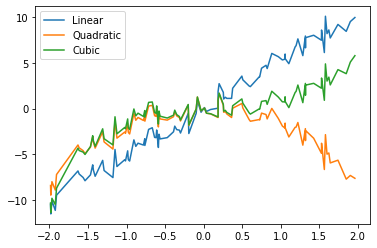

In [91]:
# Import the necessary libraries
import seaborn as sns

# Create the axis object
fig, ax = plt.subplots()

# Plot each line
line1 = sns.lineplot(x=X, y=linear, ax=ax)
line2 = sns.lineplot(x=X, y=quadratic, ax=ax)
line3 = sns.lineplot(x=X, y=cubic, ax=ax)

# Create the legend for the plot and show it
plt.legend(labels=["Linear", "Quadratic", "Cubic"])
plt.show()

Run three OLS regressions of the following specification
Yi = 1 * X  
Where Yi is first the linear output (i=1), then the quadratic output (i=2), and then the 
cubic output (i=3).   

Label each of these fitted regressions result1, result2, and result3, respectively. Then 
summarize the results together in one table using summary_col: 

In [92]:
# Make a list of different order regressions to iterate through
y_list = [linear, quadratic, cubic]

# Initialize an empty list to store the results
result = []

# Loop through the different regressions, fit each one to the data X, and store their results in result
for i in y_list:
    resulti = sm.OLS(i,X).fit()
    result.append(resulti)

    
# Print out the summary of the three different regressions
print(summary_col([result[0],result[1],result[2]],stars=True,
float_format='%0.2f', regressor_order=['x1'], 
info_dict={'N':lambda x: "{0:d}".format(int(x.nobs))}, model_names =['Linear\n(Linear)', 'Linear\n(Quadratic)',   
                                                                     'Linear\n(Cubed)'],))


                Linear     Linear    Linear
               (Linear) (Quadratic) (Cubed)
-------------------------------------------
x1             5.13***  0.29        2.42***
               (0.07)   (0.30)      (0.15) 
R-squared      0.98     0.01        0.72   
R-squared Adj. 0.98     -0.00       0.71   
N              100      100         100    
Standard errors in parentheses.
* p<.1, ** p<.05, ***p<.01


5. Add a squared input to the regressors using:

and then run three OLS regressions of the following form
Yi = 1 * X +  2 * X2  

Where Yi is first the linear output (i=4), then the quadratic output (i=5), and then the 
cubic output (i=6). And label each of the regressions according to:  

produce a summary table like in the previous question for regressions 1-6. Make the 
regressor order:

Add the following three elements the model_names list for regressions 4-6: 
'Quadratic\n(Linear)','Quadratic\n(Quadratic)','Quadratic\n
(Cubed)'

In [93]:
# Add an X^2 input to the data
data_sq = np.vstack((X,X**2)).T

# Initialize another list to store the new results
result2 = []

# Loop through the list, fit each regression to the squared data, and append the result 
for i in y_list:
    resulti = sm.OLS(i,data_sq).fit()
    result2.append(resulti)

# Set the regressor order so the linear term is first and the squared term is second
regressor_order=['x1','x2']

# Print out the summary of all 6 regressions
print(summary_col([result[0],result[1],result[2], result2[0],result2[1],result2[2]],stars=True,
float_format='%0.2f', regressor_order=regressor_order, 
info_dict={'N':lambda x: "{0:d}".format(int(x.nobs))}, model_names =['Linear\n(Linear)', 'Linear\n(Quadratic)',   
                                                                     'Linear\n(Cubed)','Quadratic\n(Linear)', 
                                                                     'Quadratic\n(Quadratic)',      
                                                                     'Quadratic\n(Cubed)']))


                Linear     Linear    Linear Quadratic  Quadratic  Quadratic
               (Linear) (Quadratic) (Cubed)  (Linear) (Quadratic)  (Cubed) 
---------------------------------------------------------------------------
x1             5.13***  0.29        2.42*** 5.13***   0.13*       2.37***  
               (0.07)   (0.30)      (0.15)  (0.07)    (0.07)      (0.13)   
x2                                          0.04      -1.96***    -0.53*** 
                                            (0.05)    (0.05)      (0.09)   
R-squared      0.98     0.01        0.72    0.98      0.94        0.79     
R-squared Adj. 0.98     -0.00       0.71    0.98      0.94        0.79     
N              100      100         100     100       100         100      
Standard errors in parentheses.
* p<.1, ** p<.05, ***p<.01


Add a cubed input (X**3) to the regressors from the previous question using vstack and 
then run three OLS regressions of the following form
Yi = 1 * X +  2 * X2+3 * X3
produce a summary table like in the previous question for regressions 1-9. Make the 
regressor order:

Add the following three elements the model_names list for regressions 7-9: 
'Cubed\n(Linear)','Cubed\n(Quadratic)','Cubed\n(Cubed)'

In [94]:
# Add an X^3 input to the data
data_cub = np.vstack((X,X**2, X**3)).T

# Initialize another list to store the new results
result3 = []

# Loop through the list, fit each regression to the cubed data, and append the result 
for i in y_list:
    resulti = sm.OLS(i,data_cub).fit()
    result3.append(resulti)
    
# Set the regressor order so the linear term is first, the squared term is second and the cubed term is third
regressor_order=['x1','x2', 'x3']

# Print out the summary of all 9 regressions
print(summary_col([result[0],result[1],result[2], result2[0],result2[1],result2[2], result3[0],
                   result3[1],result3[2]],stars=True,
float_format='%0.2f', regressor_order=regressor_order, 
info_dict={'N':lambda x: "{0:d}".format(int(x.nobs))}, model_names =['Linear\n(Linear)', 'Linear\n(Quadratic)',   
                                                                     'Linear\n(Cubed)','Quadratic\n(Linear)', 
                                                                     'Quadratic\n(Quadratic)',      
                                                                     'Quadratic\n(Cubed)', 'Cubed\n(Linear)',
                                                                     'Cubed\n(Quadratic)','Cubed\n(Cubed)']))


                Linear     Linear    Linear Quadratic  Quadratic  Quadratic  Cubed      Cubed     Cubed  
               (Linear) (Quadratic) (Cubed)  (Linear) (Quadratic)  (Cubed)  (Linear) (Quadratic) (Cubed) 
---------------------------------------------------------------------------------------------------------
x1             5.13***  0.29        2.42*** 5.13***   0.13*       2.37***   5.18***  0.18        0.18    
               (0.07)   (0.30)      (0.15)  (0.07)    (0.07)      (0.13)    (0.17)   (0.17)      (0.17)  
x2                                          0.04      -1.96***    -0.53***  0.04     -1.96***    -0.46***
                                            (0.05)    (0.05)      (0.09)    (0.05)   (0.05)      (0.05)  
x3                                                                          -0.02    -0.02       0.98*** 
                                                                            (0.07)   (0.07)      (0.07)  
R-squared      0.98     0.01        0.72    0

7) Compare and contrast the coefficients over the 9 regressions in 3-4 sentences. You know 
that the linear, quadratic, and cubic output variables should have a linear, quadratic, and 
cubic relationship with the regressor X, respectively, based on the data generation. Do 
you notice anything surprising? What coefficients match your expectation based on the 
data generating process?  


For most of the regressions, the significant coefficients are close to the coefficients used to generate the regression lines, which is expected. When we only have linear inputs, there are no significant coefficients for the quadratic regression but there is surprisingly for the cubic regression. I didn't expect this since there is no linear term used in the generation of the cubic regression. This significance goes away when we have squared and cubic inputs as well though.

8) Now, re-run the data generation code from part 1 but make 1000 observations instead of 100. That is, N=1000. Run regressions i=1 through i=9, and produce a single summary 
table using summary_col with all 9 regressions results.

In [95]:
# Set the new sample size N to 1000 and regenerate the random data X
N = 1000
X = np.sort(rng.rand(N)*input_range - input_range/2)

# This creates the vector noise which stores 100 normal random values with the distribution N(0, 0.8)
noise = rng.randn(N)*0.8

# This creates the vector linear, which is the random vector X scaled by 5 with the other random vector noise added
# to it.
linear = 5*X +noise

# This creates the vector quadratic, which is the random vector X squared and scaled by -2 with the other random 
#vector noise added to it. 
quadratic =-2*X**2 +noise

# This creates the vector cubic, which is the random vector X cubed minus X squared scaled by 0.5, with the 
# other random vector noise added to it.
cubic = X**3 - 0.5*X**2 + noise

# Create a list of regressions to loop through
y_list = [linear, quadratic, cubic]

# Initialize an empty list to store the result
result = []

# Loop through the regressions, fit each one to the data X, and append the result
for i in y_list:
    resulti = sm.OLS(i,X).fit()
    result.append(resulti)
    
# Add an X^2 term to the data
data_sq = np.vstack((X,X**2)).T

# Repeat the first loop except fit on the squared data this time
for i in y_list:
    resulti = sm.OLS(i,data_sq).fit()
    result.append(resulti)
    
# Add an X^3 term to the data
data_cub = np.vstack((X,X**2, X**3)).T

# Repeat the first loop except fit on the cubed data this time
for i in y_list:
    resulti = sm.OLS(i,data_cub).fit()
    result.append(resulti)

# Set the regressor order so that the linear term is first, then the squared term, then the cubed term
regressor_order=['x1','x2', 'x3']

# Print out all 9 regressions
print(summary_col([result[0],result[1],result[2], result[3],result[4],result[5], result[6],
                   result[7],result[8]],stars=True,
float_format='%0.2f', regressor_order=regressor_order, 
info_dict={'N':lambda x: "{0:d}".format(int(x.nobs))}, model_names =['Linear\n(Linear)', 'Linear\n(Quadratic)',   
                                                                     'Linear\n(Cubed)','Quadratic\n(Linear)', 
                                                                     'Quadratic\n(Quadratic)',      
                                                                     'Quadratic\n(Cubed)', 'Cubed\n(Linear)',
                                                                     'Cubed\n(Quadratic)','Cubed\n(Cubed)']))


                Linear     Linear    Linear Quadratic  Quadratic  Quadratic  Cubed      Cubed     Cubed  
               (Linear) (Quadratic) (Cubed)  (Linear) (Quadratic)  (Cubed)  (Linear) (Quadratic) (Cubed) 
---------------------------------------------------------------------------------------------------------
x1             5.01***  -0.29***    2.37*** 5.02***   0.02        2.45***   5.01***  0.01        0.01    
               (0.02)   (0.10)      (0.05)  (0.02)    (0.02)      (0.04)    (0.05)   (0.05)      (0.05)  
x2                                          -0.01     -2.01***    -0.48***  -0.01    -2.01***    -0.51***
                                            (0.01)    (0.01)      (0.03)    (0.01)   (0.01)      (0.01)  
x3                                                                          0.00     0.00        1.00*** 
                                                                            (0.02)   (0.02)      (0.02)  
R-squared      0.98     0.01        0.73    0

9) What differences do you notice in the regression coefficients for N=100 versus N=1000? 
What similarities? Discuss these in 3-4 sentences. Hint: think about sample size.

For N=100, the significant coefficients nearly matched the coefficients used to generate each regression line. With N=1000, these coefficients are nearly an exact match. The x1 term of the linear regression is exactly 5.00. The x2 term of the quadratic regression has a coefficient of -1.99 (very close to 2). The cubic regression has an x2 coefficient of -0.49, and a x3 coefficient of 1.00, which are both again very close to -0.5 and 1, which was used to generate the data. 

10. Load the FLS-data.csv file from the HW2 GitHub repository as ‘df_fls’.

In [96]:
df_fls = pd.read_csv("data\FLS-data.csv")

11. Create a dataframe called “df_clustering” that only contains the following variables about 
political status in the different countries:

In [97]:
df_clustering = df_fls[['Bl Mkt Pm','Civl Lib','Yrs Open','Pol Rights','Rule of Law','War Dummy','Rev & Coup']]

Run the following code and explain each line.   
a. Insert the first 5 lines of df_scaled here. Hint: use .head()  
b. Why do you need to respecify column and index labels?  
Answer here: Because the normalize fucntion creates an array, not a dataframe, so in order to make it into a dataframe we need to inptut the raw array data into pd.DataFrame and re-specify the columns and rows

In [98]:
# This creates a new array with the data scaled to values between 0 and 1
df_scaled = normalize(df_clustering)

# This creates a new dataframe from the normalized array.
df_scaled = pd.DataFrame(df_scaled, columns=df_clustering.columns, index=df_clustering.index)

# This displays the first five rows of the df_scaled dataframe
df_scaled.head()

,Bl Mkt Pm,Civl Lib,Yrs Open,Pol Rights,Rule of Law,War Dummy,Rev & Coup
0,0.015788,0.709713,0.000000,0.703012,0.040168,0.000000,0.014824
1,0.019207,0.800305,0.094969,0.548369,0.222298,0.000000,0.000000
2,0.006072,0.674618,0.018943,0.735333,0.060715,0.000000,0.009714
3,0.005547,0.684145,0.000000,0.727291,0.036977,0.000000,0.039939
4,0.016449,0.697087,0.000000,0.702950,0.052721,0.105442,0.075918


13. Plot a dendrogram using shc.dentrogram and shc.linkage for df_scaled with the ward method for the linkage (method=’ward’).  
a. Add a title to the graph: "Dendrogram of Countries Along Political Variables" and present the graph below.  
Insert graph here:  
b. Add plt.axhline(y= _, color=’r’, linestyle=’--‘) to plot to show where there is the largest gap between clusters.   Hint: you need to set the “y=...” to a number. Produce a new graph with the line.  
Insert graph here:  
c. How many clusters does this imply you should have? Hint: look at where the dendrogram switches colors from top to bottom.  
Answer: This implies that there should be 2 clusters

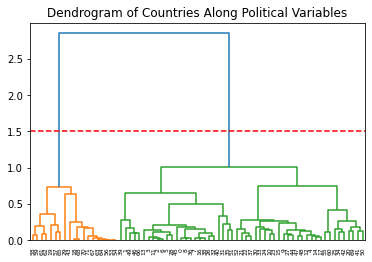

In [99]:
clusters = shc.linkage(df_scaled, method='ward')
shc.dendrogram(clusters)
plt.title("Dendrogram of Countries Along Political Variables")
plt.axhline(y=1.5, color='r', linestyle='--')

plt.show()

14. Create N clusters where N is the number of clusters from the previous question, using 
different clustering methods:  

a. Hierarchical Clustering: Use AgglomerativeClustering with the options for 
affinity=’euclidean’, and linkage=’ward’. Fit the prediction to df_scaled and save the cluster labels as a new column in the df_scaled dataframe with a column title 
‘HC labels’.  

b. KMeans Clustering: Use KMeans with the option for random_state=1680. Fit 
KMeans to df_scaled and save the cluster labels as a new column in the df_scaled 
dataframe with a column title ‘KM labels’.


In [100]:
hc = AgglomerativeClustering(2, affinity="euclidean", linkage='ward')
hc_clusters = hc.fit(df_scaled)
df_scaled['HC Labels'] = hc_clusters.labels_


km = KMeans(2, random_state=1680)
km_clusters = km.fit(df_scaled)
df_scaled['KM Labels'] = km_clusters.labels_

15. Create 4 clusters using different clustering methods:  

a. Hierarchical Clustering: Use AgglomerativeClustering with the options for 
affinity=’euclidean’, and linkage=’ward’. Fit the prediction to df_scaled and save 
the cluster labels as a new column in the df_scaled dataframe with a column title 
‘HC labels 4’.  

b. KMeans Clustering: Use KMeans with the option for random_state=1680. Fit 
KMeans to df_scaled and save the cluster labels as a new column in the df_scaled 
dataframe with a column title ‘KM labels 4’.

In [101]:
hc = AgglomerativeClustering(4, affinity="euclidean", linkage='ward')
hc_clusters = hc.fit(df_scaled)
df_scaled['HC Labels 4'] = hc_clusters.labels_


km = KMeans(4, random_state=1680)
km_clusters = km.fit(df_scaled)
df_scaled['KM Labels 4'] = km_clusters.labels_

Run the following code to show how the HC labels from 14.a relate to the Civl Lib and Yrs Open variables in df_scaled.

Then adjust the code to produce graphs for [‘KC labels’, ‘HC labels 4’, ‘KM labels 4’].  
Insert the four graphs here:

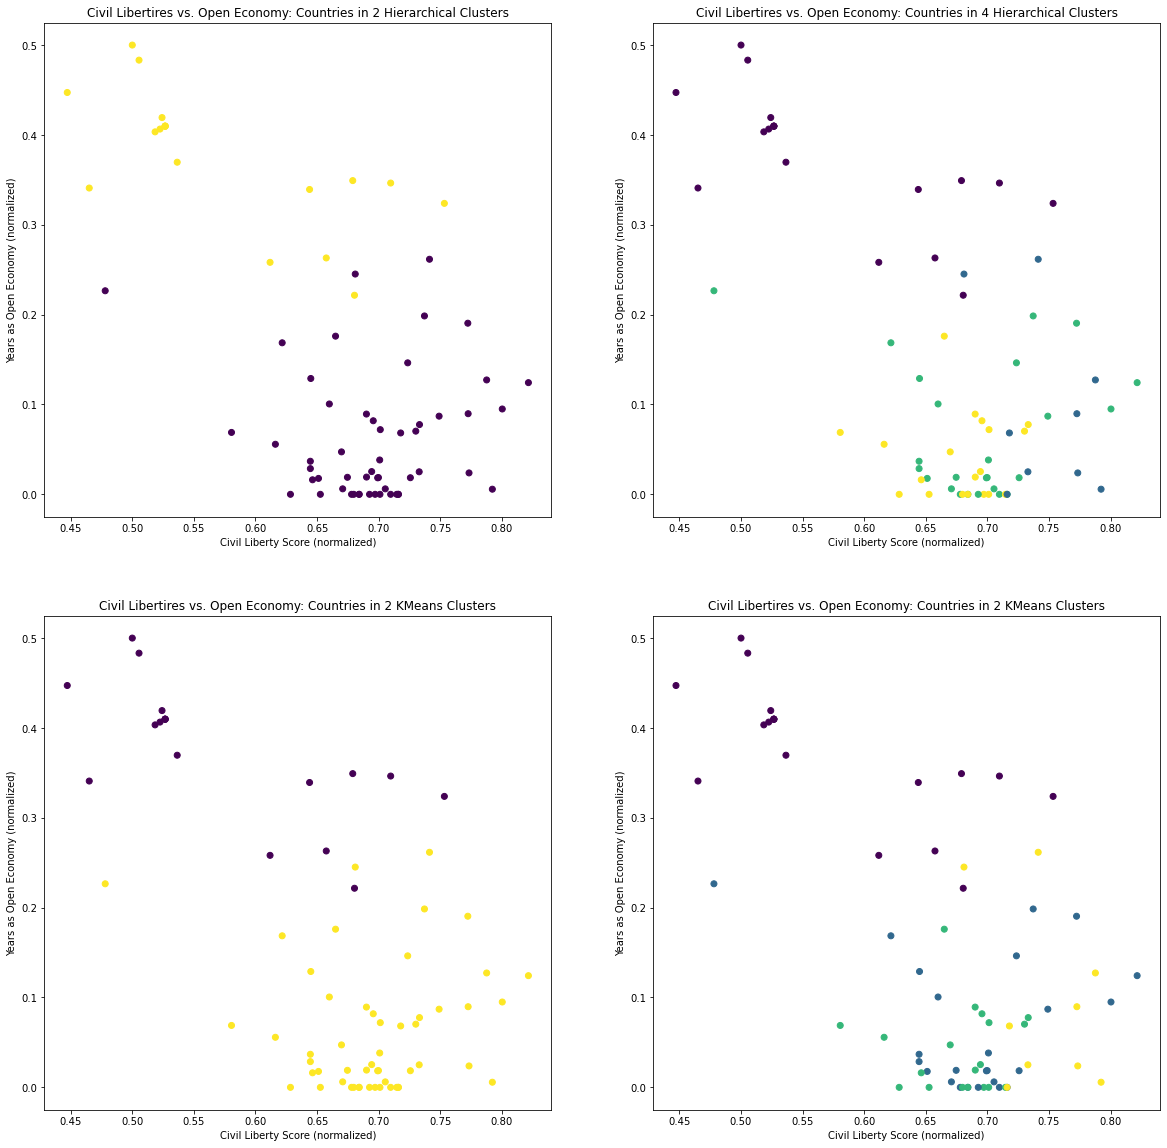

In [102]:
fig, ax = plt.subplots(2,2,figsize=(20,20))

ax[0,0].scatter(df_scaled['Civl Lib'], df_scaled['Yrs Open'], c=df_scaled['HC Labels'])
ax[0,0].set_xlabel('Civil Liberty Score (normalized)')
ax[0,0].set_ylabel('Years as Open Economy (normalized)')
ax[0,0].set_title('Civil Libertires vs. Open Economy: Countries in 2 Hierarchical Clusters')

ax[1,0].scatter(df_scaled['Civl Lib'], df_scaled['Yrs Open'], c=df_scaled['KM Labels'])
ax[1,0].set_xlabel('Civil Liberty Score (normalized)')
ax[1,0].set_ylabel('Years as Open Economy (normalized)')
ax[1,0].set_title('Civil Libertires vs. Open Economy: Countries in 2 KMeans Clusters')

ax[0,1].scatter(df_scaled['Civl Lib'], df_scaled['Yrs Open'], c=df_scaled['HC Labels 4'])
ax[0,1].set_xlabel('Civil Liberty Score (normalized)')
ax[0,1].set_ylabel('Years as Open Economy (normalized)')
ax[0,1].set_title('Civil Libertires vs. Open Economy: Countries in 4 Hierarchical Clusters')

ax[1,1].scatter(df_scaled['Civl Lib'], df_scaled['Yrs Open'], c=df_scaled['KM Labels 4'])
ax[1,1].set_xlabel('Civil Liberty Score (normalized)')
ax[1,1].set_ylabel('Years as Open Economy (normalized)')
ax[1,1].set_title('Civil Libertires vs. Open Economy: Countries in 2 KMeans Clusters')

plt.show()

17. Calculate the first and second principal components of df_scaled using   
PCA(n_components=2).fit_transform(df_scaled)  
And add them to the df_scaled dataframe with titles ‘pc1’ and ‘pc2’.  

a. Produce four graphs showing the different clustering results [‘HC labels’,‘KC 
labels’, ‘HC labels 4’, ‘KM labels 4’] with the first principal component on the x 
axis and the second principal component on the y axis. Hint: use the code from 16 
as a template for plotting here, but be sure to change the axis labels and the title. 
Insert your four graphs here:  

b. Describe the differences in visualizing clusters using variables in 16 vs. using 
PCA in 17? Why does PCA help with visualization? Summarize your answers in 
2-3 sentences.  

Answer here: PCA separates the clusters much more than any two individual variables, so it's much easier to see the differences in the different clusters. In this case, it shows that there should probably be 4 clusters instead of 2 as the dendogram eariler suggested.

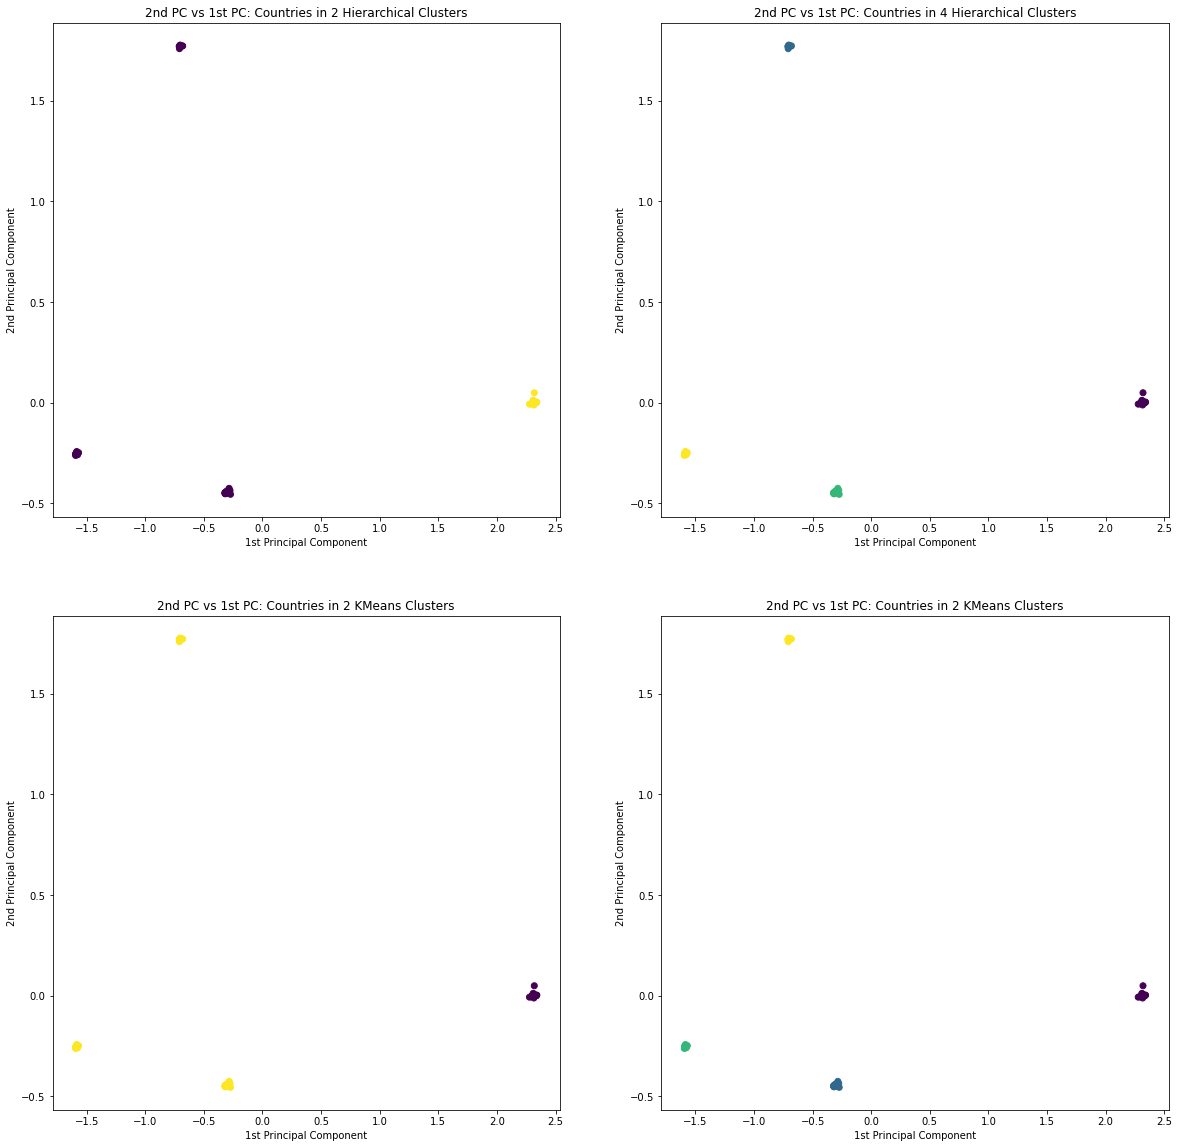

In [103]:
prin_comps = PCA(n_components=2).fit_transform(df_scaled)
df_scaled['pc1'] = prin_comps[:,0]
df_scaled['pc2'] = prin_comps[:,1]

fig, ax = plt.subplots(2,2,figsize=(20,20))

ax[0,0].scatter(df_scaled['pc1'], df_scaled['pc2'], c=df_scaled['HC Labels'])
ax[0,0].set_xlabel('1st Principal Component')
ax[0,0].set_ylabel('2nd Principal Component')
ax[0,0].set_title('2nd PC vs 1st PC: Countries in 2 Hierarchical Clusters')

ax[1,0].scatter(df_scaled['pc1'], df_scaled['pc2'], c=df_scaled['KM Labels'])
ax[1,0].set_xlabel('1st Principal Component')
ax[1,0].set_ylabel('2nd Principal Component')
ax[1,0].set_title('2nd PC vs 1st PC: Countries in 2 KMeans Clusters')

ax[0,1].scatter(df_scaled['pc1'], df_scaled['pc2'], c=df_scaled['HC Labels 4'])
ax[0,1].set_xlabel('1st Principal Component')
ax[0,1].set_ylabel('2nd Principal Component')
ax[0,1].set_title('2nd PC vs 1st PC: Countries in 4 Hierarchical Clusters')

ax[1,1].scatter(df_scaled['pc1'], df_scaled['pc2'], c=df_scaled['KM Labels 4'])
ax[1,1].set_xlabel('1st Principal Component')
ax[1,1].set_ylabel('2nd Principal Component')
ax[1,1].set_title('2nd PC vs 1st PC: Countries in 2 KMeans Clusters')

plt.show()

18. Run the following code to create training and testing splits of the df_fls dataframe


In [104]:
y=df_fls['y']
X=df_fls.drop(columns=['y'])
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=1680)

19. Run an OLS regression on the training data. Produce the summary statistics using 
.summary() and paste them here:

In [105]:
results = sm.OLS(y_train, X_train).fit()
print(results.summary())

                                 OLS Regression Results                                
Dep. Variable:                      y   R-squared (uncentered):                   0.982
Model:                            OLS   Adj. R-squared (uncentered):              0.949
Method:                 Least Squares   F-statistic:                              30.22
Date:                Fri, 04 Mar 2022   Prob (F-statistic):                    7.94e-13
Time:                        19:22:08   Log-Likelihood:                         -26.936
No. Observations:                  64   AIC:                                      135.9
Df Residuals:                      23   BIC:                                      224.4
Df Model:                          41                                                  
Covariance Type:            nonrobust                                                  
                  coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------

20. Run a LASSO regression on the training data and search over different alpha parameters in using alphas=np.linspace(1e-6, 1, num=50). Hint: reference the review session example for coding LASSO.  

a. What is the optimal alpha that you find?   

Answer: 1e-6

b. Insert a plot of alphas on the x axis and cv_errors on the y axis:

1e-06


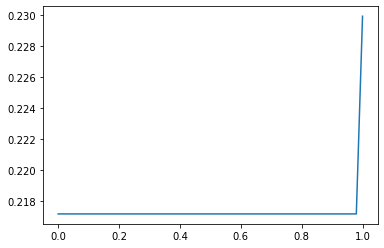

In [120]:
lassoReg = LassoCV(alphas = np.linspace(1e-6, 1, num=50), cv=10, 
                   normalize=True, max_iter=10000).fit(X_train,y_train)
print(lassoReg.alpha_)

errors = lassoReg.mse_path_
cv_errs = []

for cv in errors:
    cv_errs.append(cv[5])

plt.plot(np.linspace(1e-6, 1, num=50), cv_errs)


plt.show()

21. Run a Ridge Regression on the training data and search over different alpha parameters in 
using alphas=np.linspace(1e-6, 1, num=50). Hint: reference the review session example 
for coding Ridge regressions.  

a. What is the optimal alpha that you find?   

Answer: 0.20408242857142858

b. Insert a plot of alphas on the x axis and cv_errors on the y axis:

0.20408242857142858


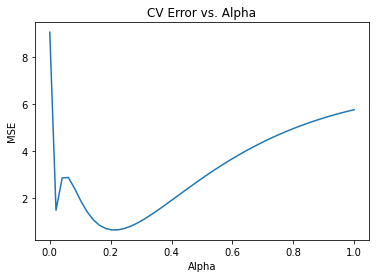

In [107]:
alphas = np.linspace(1e-6, 1, num=50)
cv_errs = []
coefs = []
for alpha in alphas:
    ridgeReg = Ridge(alpha=alpha, normalize=True)
    ridgeReg.fit(X_train, y_train)
    y_pred = ridgeReg.predict(X_test)
    cv_errs.append(np.mean((y_pred - y_test)**2))
    coefs.append(ridgeReg.coef_)
coefs = pd.DataFrame(coefs, columns=X.columns)
coefs.set_index(alphas, inplace=True)


alph_index = cv_errs.index(min(cv_errs))
print(alphas[alph_index])

plt.plot(alphas, cv_errs)
plt.title("CV Error vs. Alpha")
plt.xlabel("Alpha")
plt.ylabel("MSE")
plt.show()

22. Compare the regression coefficients from the three different approaches using:

a. Insert the coef_comp table here:  

b. Write 2-3 sentences comparing the coefficients and explain why they are 
different.  

Answer here:  For OLS, the coefficients simply try to minimize the mean squared error between the residuals and the line. Ridge tries to reduce the coefficients as much as possible without decreasing the overall accuracy. For example two variables may be correlated and therefore one may have a large Bj and the other a large Bi, but Ridge stops this from happening. Lasso starts with all coefficients equal to zero, and then updates the one most correlated with the target variable, and kicking out any variable that gets updated from non-zero to zero.

c. Look at Table 4 in Varian (2014) (link to paper in Canvas and GitHub). Compare 
you coefficients from LASSO to the column he has for the LASSO regression. Do 
you come to the same conclusions about which regressors to keep in the 
regression and their order of importance? If they are different, explain a possible 
reason for that.

We both agree to kick out life expectancy, but disagree on GDP level and rule of law. This could be because of our choices of hyperparameters (alpha) for the lasso regression

In [108]:
coef_comp=pd.DataFrame({'var':X.columns, 
'val_ols':results.params.tolist(), 
'val_lasso':lassoReg.coef_, 'var_ridge':ridgeReg.coef_})

coef_comp

,var,val_ols,val_lasso,var_ridge
0,GDPsh560,-1.141114,-1.609136,-0.172437
1,Confuncious,7.915376,7.042483,3.359646
2,Life Exp,0.130482,0.100810,0.009026
3,Equip Inv,13.823435,12.592492,7.094362
4,SubSahara,-1.699480,-2.186387,-0.388973
5,Muslim,-0.205658,0.096270,0.173420
6,Rule of Law,0.750318,0.873715,0.356460
7,Yrs Open,-0.503423,-0.628784,0.493721
8,Eco Org,0.169880,0.167642,0.075110
9,Protestants,-0.453677,-0.306667,-0.695825


23. Load the titanic3.csv file in as ‘df_titanic’ from the GitHub repository for HW2.

In [109]:
df_titanic = pd.read_csv('data/titanic3.csv')

24. In Varian (2014), there is a discussion about wanting to allow for nonlinearity in age to 
affect the prediction of survival of Titanic passengers. This problem will compare 
estimating a logit with estimating neural network (multilayer perceptron). Explain the 
following lines of code and run them:

a. Compare the accuracy scores in-sample and out-of-sample for the logit regression 
and for the neural network in 2-3 sentences.   
Answer here:  For both classifiers, the in-sample accuracy was slightly higher than the out-of-sample accuracy, which is expected since in-sample predictions use the data that the model was directly trained on instead of new data. However, both accuracy scores for the neural network were higher than the accuracy scores for the logistic regression.

b. Is the difference between the accuracies what you would have expected? Spend 2-3 sentences discussing possible explanations for the differences.   
Answer here: Yes, the neural network performs slightly better because it's able to predict a complex relationship. If it had more data to train on, it would likely perform even better than the logistic regression.

In [110]:
# These lines first drop the rows of the dataframe that contain null values for the columns [
# 'survived','age', 'sex','pclass'], and then it creates a new column that contains 1 if the person if female and
# 0 if the person is not
df_titanic.dropna(subset=['survived','age', 'sex','pclass'],inplace=True)
df_titanic['female']= np.where(df_titanic['sex']=='female',1,0)

# These lines save ['survived'] as the target variable and ['age','pclass', 'female'] as the features
y= df_titanic['survived']
X= df_titanic[['age','pclass', 'female']]

# This splits 80% of the sub-dataframes X and y into the training set and the rest into the testing set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1680)

# These lines instantiate a scaler to scale the data to fit a standard normal distribution with mean 0 and standard
# deviation 1. The mean and standard deviation are first computed by fitting the scaler on the training data, and
# then both the training and testing datasets are actually scaled using the transform method.
scaler=StandardScaler() 
scaler.fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

# This instantiates a neural network classifier with two hidden layers of size 4 and 2 respectively and a 
# logistic activation fucntion and an adam solver. It also has a maximum of 500 iterations and initial learning
# rate of 0.01
MLP = MLPClassifier(hidden_layer_sizes=(4,2),random_state=1680,activation='logistic', solver='adam',
                    max_iter =500,verbose=True, learning_rate_init=0.01)

# This fits the classifier to the training data.
MLP.fit(X_train,y_train) 

# This prints the accuracy for in-sample and out-of-sample predictions for the neural net.
print(accuracy_score(y_train,MLP.predict(X_train)))
print(accuracy_score(y_test, MLP.predict(X_test))) 

# This instantiates a logistic regression model with a liblienar solver and fits it to the training data
logitmodel = LogisticRegression(solver='liblinear', random_state=1680).fit(X_train, y_train)

# This prints the accuracy for in-sample and out-of-sample predictions for the logistic regression.
print(accuracy_score(y_train,logitmodel.predict(X_train)))
print(accuracy_score(y_test, logitmodel.predict(X_test)))

Iteration 1, loss = 0.71166718
Iteration 2, loss = 0.69564375
Iteration 3, loss = 0.68520857
Iteration 4, loss = 0.67802560
Iteration 5, loss = 0.67371194
Iteration 6, loss = 0.67103982
Iteration 7, loss = 0.66935104
Iteration 8, loss = 0.66743090
Iteration 9, loss = 0.66538807
Iteration 10, loss = 0.66293164
Iteration 11, loss = 0.66010487
Iteration 12, loss = 0.65671367
Iteration 13, loss = 0.65240347
Iteration 14, loss = 0.64770667
Iteration 15, loss = 0.64223625
Iteration 16, loss = 0.63618211
Iteration 17, loss = 0.62964568
Iteration 18, loss = 0.62252273
Iteration 19, loss = 0.61482248
Iteration 20, loss = 0.60667495
Iteration 21, loss = 0.59786557
Iteration 22, loss = 0.58870687
Iteration 23, loss = 0.57968533
Iteration 24, loss = 0.57040901
Iteration 25, loss = 0.56147817
Iteration 26, loss = 0.55234323
Iteration 27, loss = 0.54379160
Iteration 28, loss = 0.53601911
Iteration 29, loss = 0.52869627
Iteration 30, loss = 0.52233033
Iteration 31, loss = 0.51599733
Iteration 32, los

c. Print out the descriptive statistics for y_train and y_test.  
Paste output here:

In [111]:
print(y_train.describe())
print(y_test.describe())

count    836.000000
mean       0.399522
std        0.490093
min        0.000000
25%        0.000000
50%        0.000000
75%        1.000000
max        1.000000
Name: survived, dtype: float64
count    210.000000
mean       0.442857
std        0.497911
min        0.000000
25%        0.000000
50%        0.000000
75%        1.000000
max        1.000000
Name: survived, dtype: float64


25. Now rerun the previous code, but add stratify=y into the train_test_split command.  
a. How do the descriptive statistics for y_train and y_test change and how do the  
accuracy scores change?  

Answer Here:  The descriptive statistics for y_train and y_test are now nearly identical, which means that the test data is now a more representative subset of the training data. This actually caused a slight decrease ina accuracy though, which means that the dataset is likely imbalanced and the target variable has a lot more of one value than another. 

b. What does “stratify” do and why would it change your results?   
Answer here:  Stratify splits the dataset into training and testing data such that the target variable has a similar distribution between the two datasets. This helps prevent the model from over-predicting the over-represented variable and under-predicting the under-represnted one. 

In [112]:
df_titanic.dropna(subset=['survived','age', 'sex','pclass'],inplace=True)
df_titanic['female']= np.where(df_titanic['sex']=='female',1,0)

y= df_titanic['survived']
X= df_titanic[['age','pclass', 'female']]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1680, stratify=y)

scaler=StandardScaler() 
scaler.fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

MLP = MLPClassifier(hidden_layer_sizes=(4,2),
  random_state=1680,activation='logistic', solver='adam', max_iter =500,
                    verbose=True, learning_rate_init=0.01)
MLP.fit(X_train,y_train) 

print(accuracy_score(y_train,MLP.predict(X_train)))
print(accuracy_score(y_test, MLP.predict(X_test))) 

logitmodel = LogisticRegression(solver='liblinear', random_state=1680).fit(X_train, y_train)

print(accuracy_score(y_train,logitmodel.predict(X_train)))
print(accuracy_score(y_test, logitmodel.predict(X_test)))

Iteration 1, loss = 0.70894753
Iteration 2, loss = 0.69741544
Iteration 3, loss = 0.68669943
Iteration 4, loss = 0.68101162
Iteration 5, loss = 0.67693919
Iteration 6, loss = 0.67398654
Iteration 7, loss = 0.67215091
Iteration 8, loss = 0.67096901
Iteration 9, loss = 0.66898181
Iteration 10, loss = 0.66659063
Iteration 11, loss = 0.66320451
Iteration 12, loss = 0.65927254
Iteration 13, loss = 0.65449687
Iteration 14, loss = 0.64898397
Iteration 15, loss = 0.64192832
Iteration 16, loss = 0.63462357
Iteration 17, loss = 0.62531451
Iteration 18, loss = 0.61571887
Iteration 19, loss = 0.60527922
Iteration 20, loss = 0.59445752
Iteration 21, loss = 0.58344477
Iteration 22, loss = 0.57183734
Iteration 23, loss = 0.56036779
Iteration 24, loss = 0.54944270
Iteration 25, loss = 0.53896643
Iteration 26, loss = 0.52987271
Iteration 27, loss = 0.52153519
Iteration 28, loss = 0.51403032
Iteration 29, loss = 0.50749977
Iteration 30, loss = 0.50196190
Iteration 31, loss = 0.49711786
Iteration 32, los

In [113]:
print(y_train.describe())
print(y_test.describe())

count    836.000000
mean       0.407895
std        0.491738
min        0.000000
25%        0.000000
50%        0.000000
75%        1.000000
max        1.000000
Name: survived, dtype: float64
count    210.000000
mean       0.409524
std        0.492921
min        0.000000
25%        0.000000
50%        0.000000
75%        1.000000
max        1.000000
Name: survived, dtype: float64


26. Look at the other variables in df_titanic. What other variables besides age do you think would be important in predicting survival?  

a. List the variables you think of as important here and explain why you think they 
would improve prediction. Hint: you may need to transform variables into 
numerical representations/dummy variables.  

Answer here: Some other potentially important variables might be cabin, sibsp, and parch. The cabin may be important because people in certain parts of the boat may have had an easier time escaping safely than others. Sibling/spouse and parent/child may be important because families likely did not want to be broken up, so those with more family members on board may have been more reluctant to escape if their whole family couldn't do it together.

b. Run the logit regression with the variables you listed and print the accuracy 
below. Did your accuracy improve?  
Answer here: The in-sample accuracy increased significantly, but the out-of-sample accuracy decreased considerably. This means including these variable led to the model overfitting on the training data.

In [115]:
df_titanic.dropna(subset=['survived','age', 'sex','pclass', 'cabin', 'sibsp', 'parch'],inplace=True)
df_titanic['female']= np.where(df_titanic['sex']=='female',1,0)

y= df_titanic['survived']
X= df_titanic[['age','pclass', 'female', 'cabin', 'sibsp', 'parch']]
X = pd.get_dummies(X)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1680, stratify=y)

logitmodel = LogisticRegression(solver='liblinear', random_state=1680).fit(X_train, y_train)

print(accuracy_score(y_train,logitmodel.predict(X_train)))
print(accuracy_score(y_test, logitmodel.predict(X_test)))

0.9262672811059908
0.6727272727272727
